In [9]:
from tqdm import tqdm
import numpy as np
from loguru import logger

from m3gnet.datasets import MPF2021Dataset
from torch_geometric.loader import DataLoader

import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
mpf2021 = MPF2021Dataset()
mpf2021_dataloader = DataLoader(mpf2021, batch_size=8, shuffle=False, num_workers=4)

In [ ]:
energy_list = []
energy_pa_list = []
for batch in tqdm(mpf2021_dataloader, total=len(mpf2021_dataloader), desc="Loading from MPF2021"):
    num_atoms = batch.total_num_atoms.numpy()
    energy = batch.energy.numpy() # shape (batch_size, )
    energy_pa = energy / num_atoms
    energy_list.extend(energy)
    energy_pa_list.extend(energy_pa)
energy_list = np.array(energy_list)
energy_pa_list = np.array(energy_pa_list)
logger.info(f"Total number of structures: {len(energy_list)}")
logger.info(f"Energy range: {energy_list.min()} to {energy_list.max()} eV")
logger.info(f"Energy per atom range: {energy_pa_list.min()} to {energy_pa_list.max()} eV/atom")

Loading from MPF2021: 100%|██████████| 23461/23461 [01:44<00:00, 223.92it/s]


In [28]:
logger.info("="*50)
logger.info(f"Total number of structures: {len(energy_list)}")
logger.info(f"Energy mean: {energy_list.mean():+.6f} eV")
logger.info(f"Energy  std: {energy_list.std():+.6f} eV")
logger.info(f"Energy per atom mean: {energy_pa_list.mean():+.6f} eV/atom")
logger.info(f"Energy per atom  std: {energy_pa_list.std():+.6f} eV/atom")
logger.info("="*50)


2025-09-01 14:36:11.606 | INFO     | __main__:<module>:1 - ==================================================
2025-09-01 14:36:11.606 | INFO     | __main__:<module>:2 - Total number of structures: 187687
2025-09-01 14:36:11.607 | INFO     | __main__:<module>:3 - Energy mean: -184.374191 eV
2025-09-01 14:36:11.609 | INFO     | __main__:<module>:4 - Energy  std: +188.891602 eV
2025-09-01 14:36:11.610 | INFO     | __main__:<module>:5 - Energy per atom mean: -5.974961 eV/atom
2025-09-01 14:36:11.611 | INFO     | __main__:<module>:6 - Energy per atom  std: +1.860012 eV/atom
2025-09-01 14:36:11.612 | INFO     | __main__:<module>:7 - ==================================================


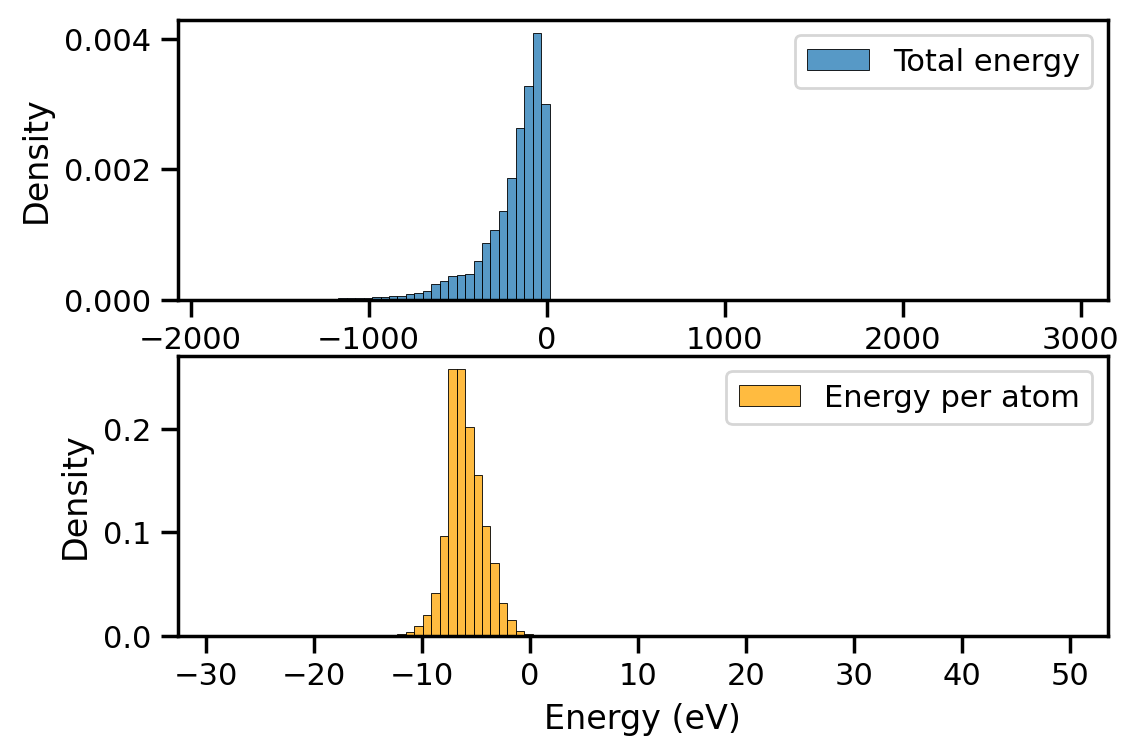

In [ ]:
sns.set_context("notebook")
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(211)
sns.histplot(energy_list, ax=ax, bins=100, kde=False, stat="density", label="Total energy")
plt.legend()
ax = fig.add_subplot(212)
sns.histplot(energy_pa_list, ax=ax, bins=100, kde=False, stat="density", label="Energy per atom", color="orange")
plt.legend()
plt.xlabel("Energy (eV)")
plt.show()